<a href="https://colab.research.google.com/github/bkokalari/Doctoranytime-Automatic-Review-Acceptance-Model/blob/main/Greek/simple_transformers_gr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Pre proc

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 3.4MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 2.9MB 10.6MB/s 
     |████████████████████████████████| 1.1MB 30.4MB/s 
     |████████████████████████████████| 1.7MB 43.5MB/s 
     |████████████████████████████████| 7.4MB 18.4MB/s 
     |████████████████████████████████| 317kB 57.7MB/s 
     |████████████████████████████████| 1.1MB 53.3MB/s 
     |████████████████████████████████| 890kB 45.4MB/s 
     |████████████████████████████████| 122kB 57.5MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 163kB 58.7MB/s 
     |████████████████████████████████| 133kB 60.3MB/s 
     |████████████████████████████████| 6.7MB 53.1MB/s 
     |████████████████████████████████| 112kB 58.6MB/s 
     |████████████████████████████████| 4.4MB 51.8MB/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
path_root = "/content/drive/My Drive/reviews_ml/v2/Greek/"
revs_preprocessed = pd.read_csv(path_root + "augmented_greek.csv") 
revs_preprocessed = revs_preprocessed.dropna()
revs_preprocessed.sample(5)


,review,approved
27769,Επισκευτηκαμε την γιατρο για μελος της οικογεν...,0
14400,Η εξέταση ήταν προσεκτική και σε βαθος,1
1274,"Πολύ ανθρώπινη και φιλική, ερεύνησε σε βάθος τ...",1
103730,Εξαιρετικός Γιατρός..,1
22361,"Πολυ καλος, ευγενικος και επεξηγηματικος. Με β...",1


In [ ]:
revs = revs_preprocessed
revs.approved.value_counts()


1    123116
0      8646
Name: approved, dtype: int64

In [ ]:
import numpy as np
r_train, r_validate, r_test = np.split(revs.sample(frac=1), [int(.6*len(revs)), int(.8*len(revs))])

In [ ]:
from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging
import torch
import sklearn


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Train and Evaluation data needs to be in a Pandas Dataframe of two columns. The first column is the text with type str, and the second column is the label with type int.
train_data = r_train
train_df = pd.DataFrame(train_data)

eval_data = r_validate
eval_df = pd.DataFrame(eval_data)
model_path = path_root+"savedModel_greekBert"


####Args

In [ ]:
//default simple transformers params
self.args = {
   'model_type':  'roberta',
   'model_name': 'roberta-base',
   'output_dir': 'outputs/',
   'cache_dir': 'cache/',
   'fp16': True,
   'fp16_opt_level': 'O1',
   'max_seq_length': 128,
   'train_batch_size': 8,
   'eval_batch_size': 8,
   'gradient_accumulation_steps': 1,
   'num_train_epochs': 1,
   'weight_decay': 0,
   'learning_rate': 4e-5,
   'adam_epsilon': 1e-8,
   'warmup_ratio': 0.06,
   'warmup_steps': 0,
   'max_grad_norm': 1.0,
   'logging_steps': 50,
   'evaluate_during_training': False,
   'save_steps': 2000,
   'eval_all_checkpoints': True,
   'use_tensorboard': True,
   'overwrite_output_dir': False,
   'reprocess_input_data': False,
}


#Model

## 1 epoch


In [ ]:
# Create a TransformerModel
train_args={
    'overwrite_output_dir': True
}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "nlpaueb/bert-base-greek-uncased-v1",
    args=train_args
)


# Train the model
model.train_model(train_df)

torch.save(model, model_path )

Some weights of the model checkpoint at nlpaueb/bert-base-greek-uncased-v1 were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification 

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WA

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


## 2 epochs

In [ ]:
model = torch.load(model_path)
result, model_outputs, wrong_predictions = model.eval_model(eval_df, acc=sklearn.metrics.accuracy_score)

#Predict

##Random manual testing

In [ ]:
predictions, raw_outputs = model.predict(['you are a fucking asshole ', 'the doctor was really good',' dsf', ' dfjdnf@fdfg.gr 29954954', 'he charged me 10000 euros for bullshit' ])
predictions

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


array([0, 1, 0, 0, 0])

In [ ]:
r_test.head()

,TranslatedReview,Approved
32589,Consistent and meticulous doctor. It inspired ...,1
55954,Consistent,1
90859,The best for the first visit and contact of a ...,1
131350,flawless !!!,1
116426,I visited her for the first time and I was happy.,1


In [ ]:
r_test.Approved.value_counts()

1    24571
0     1744
Name: Approved, dtype: int64

In [ ]:
r_test.TranslatedReview.values

array(['Consistent and meticulous doctor. It inspired me to trust. I highly recommend it.',
       'Consistent',
       'The best for the first visit and contact of a doctor with a child. My little one who does not get along well with the doctors felt very comfortable and trusted him. Congratulations !!!!',
       ..., 'I highly recommend him !!!!',
       'An excellent doctor, he respects your problem and really listens to the patient. It exudes security and confidence. Very good at his job and I would highly recommend him !!!',
       'Remarkable scientist with excellent knowledge of the subject and friendly mood. The program he proposes is based on and fully adapted to your data without feeling like you are on a diet. I would highly recommend him.'],
      dtype=object)

##Test dataset

In [ ]:
y_test = r_test.TranslatedReview.values

predictions2,raw2 = model.predict(y_test)
predictions2epochs, raw2epochs = model2.predict(y_test)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


In [ ]:
y_values = r_test.Approved.values

##Results 1 epoch

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [ ]:
conf_mat = confusion_matrix(y_true=y_values,
                            y_pred=predictions2)
conf_mat

array([[ 1084,   660],
       [  354, 24217]])

In [ ]:
conf_mat = confusion_matrix(y_true=y_values,
                            y_pred=predictions2epochs)
conf_mat

In [ ]:
import matplotlib.pyplot as plt

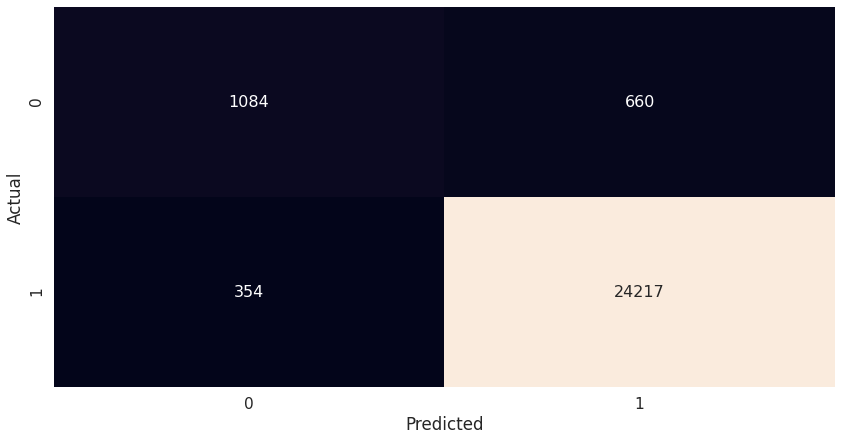

In [ ]:


array_final = conf_mat
x_axis = ['0','1']
cm = pd.DataFrame(array_final)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize=(14,7))

sns.set(font_scale=1.4)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=x_axis, cbar=False, fmt='d',annot=True, annot_kws={"size":16})

In [ ]:
print(classification_report(y_true=y_values,
                            y_pred=predictions2))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68      1744
           1       0.97      0.99      0.98     24571

    accuracy                           0.96     26315
   macro avg       0.86      0.80      0.83     26315
weighted avg       0.96      0.96      0.96     26315



##Results 2 epochs

In [ ]:
conf_mat2 = confusion_matrix(y_true=y_values,
                            y_pred=predictions2epochs)
conf_mat2

array([[ 1138,   549],
       [  274, 24354]])

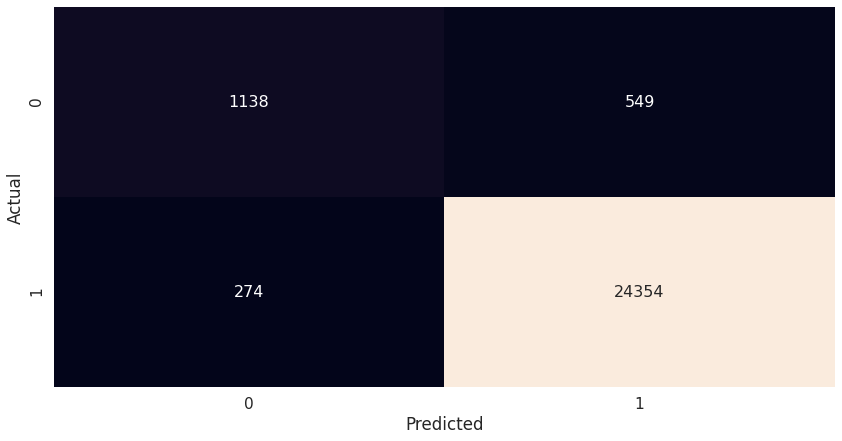

In [ ]:


array_final = conf_mat2
x_axis = ['0','1']
cm = pd.DataFrame(array_final)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize=(14,7))

sns.set(font_scale=1.4)
sns.heatmap(cm,xticklabels=x_axis,yticklabels=x_axis, cbar=False, fmt='d',annot=True, annot_kws={"size":16})

In [ ]:

print(classification_report(y_true=y_values,
                            y_pred=predictions2epochs))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1687
           1       0.98      0.99      0.98     24628

    accuracy                           0.97     26315
   macro avg       0.89      0.83      0.86     26315
weighted avg       0.97      0.97      0.97     26315

